In [8]:
import itertools
## Regular Expression
import re

## Arrays
import numpy as np

## DataFrames
import pandas as pd

## Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from IPython.display import Image

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

import contractions
import spacy
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('nlp_reviews_cleaned.csv', delimiter=',')
df['rating_class'] = df['rating'].apply(lambda x: 0 if x <= 2 else 1)

X = df['clean_text']
y = df['rating_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [3]:
count_vect1 = CountVectorizer(ngram_range=(1,1))
count_vect_train1 = count_vect1.fit_transform(X_train)
count_vect_train1 = count_vect_train1.toarray()
count_vect_test1 = count_vect1.transform(X_test)
count_vect_test1 = count_vect_test1.toarray()

In [4]:
from collections import Counter
from imblearn.over_sampling import SMOTE 
sm = SMOTE(ratio = 'minority',random_state=5)
df_x, df_y = sm.fit_sample(count_vect_train1, y_train)
#print (count_vect_train.value_counts(), np.bincount(df_target))

In [5]:
from collections import Counter
Counter(df_y)

Counter({1: 9055, 0: 9055})

In [6]:
clf1 = LogisticRegression(random_state=1)
clf2 = SVC(kernel = 'linear')

labels = ['Logistic Regression', 'Linear SVM']
print('The Effect of SMOTE')

for clf, label in zip([clf1, clf2], labels):
    clf.fit(df_x, df_y)
    y_pred_clf = clf.predict(count_vect_test1)
    cm = confusion_matrix(y_test, y_pred_clf)
    
    print('********** [{}] **********\n'.format(label))
    print('1. Accuarcy: {}\n'.format(metrics.accuracy_score(y_test, y_pred_clf)))
    print('2. The F-1 score of the model {}\n'.format(f1_score(y_test, y_pred_clf, average='weighted')))
    print('3. The recall score of the model {}\n'.format(recall_score(y_test, y_pred_clf, average='weighted')))
    print('4. Classification Report:\n{}\n5. Confusion matrix:\n{}\n\n\n'.format
          (classification_report(y_test, y_pred_clf), cm))

The Effect of SMOTE
********** [Logistic Regression] **********

1. Accuarcy: 0.879746835443038

2. The F-1 score of the model 0.8866422688629525

3. The recall score of the model 0.879746835443038

4. Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.47      0.41       293
           1       0.95      0.92      0.93      3025

   micro avg       0.88      0.88      0.88      3318
   macro avg       0.65      0.69      0.67      3318
weighted avg       0.90      0.88      0.89      3318

5. Confusion matrix:
[[ 137  156]
 [ 243 2782]]



********** [Linear SVM] **********

1. Accuarcy: 0.8682941531042797

2. The F-1 score of the model 0.8765735904285497

3. The recall score of the model 0.8682941531042797

4. Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.42      0.36       293
           1       0.94      0.91      0.93      3025

   micro avg       0.87      0.87  

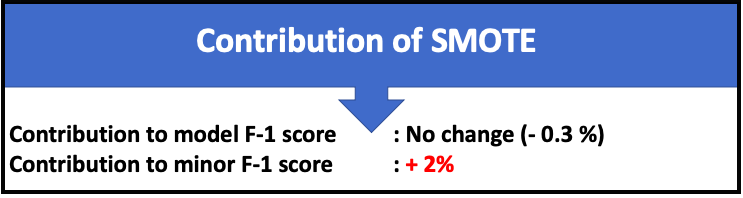

In [9]:
img = 'SMOTE.png'
Image(filename=img)